---
# A roadmap for a study of the Big Data Derby
                    by Emilio E. Falco
                    October 27th 2022
---

In this notebook, I analyze the data from the Big Data Derby.

I assumed that the prowess, experience and circumstances of each jockey 
in each race were reflected in one indicator, the placement in each race.
I also assumed other factors such as velocity, acceleration and power generated
that I derived for each jockey in each race could also contribute to this indicator. 

I used the file **nyra_2019_complete.csv**. I used *Pandas* to load 
the data into a dataframe and created several functions to prepare 
the data for my analyss. I describe here the data preparation, the properties 
of the data, the modeling of the data, and my results.

----
## Data preparation
----

I used Jupyter notebooks throughout, and implemented the following sequence.

1) Import python libraries such as *Pandas, numpy, scipy, sklearn* and *matplotlib*.
2) Load the data into a *Pandas* dataframe, which I labeled nydata.
3) Define useful constants such as the radius of the earth.
4) Define functions for processing the data.
## Data processing
5) Use a python loop to generate a dataframe containing properties for each jockey in each race. The full data set in nydata contained the Trakus_index data for each race, resulting in 
55228430 rows and 18 columns in the dataframe. 
6) Loop over jockeys extracting properties. The data in the **nyra_2019_complete.csv** 
needed to be rectified. For example, trakus_index values were not in temporal order, so I sorted them in increasing order. I also sorted the entries according to race date, race number and post time. That allowed me to calculate a timeline for each race. 
From that, I estimated the velocity throughout the race (by taking the differences of 
the position x,y vectors, offsetting a copy of each vector by one unit) and associated values such as the maximum and median velocities, the acceleration, the power generated (assuming a standard weight for all the horses) and the total energy generated. I used the radius of the earth and the mean latitude and longitude (lat, lon) of the 3 venues to calculate x,y in meters from the lat,lon values in nydata. I assumed the unit of trakus_index time is 0.25 seconds. I converted all the categorical data into numbers for my analysis.

    The result was a condensed dataframe I labeled Jdata, with 14891 rows and 29 columns for 178 different jockeys and 217 distinct race dates. The cell below shows a sample of the first 5 rows of Jdata. The first 10 columns are from nydata, the rest were my calculations. There were 22 entries from nydata with problems such as discontinuous trakus_index values or incomplete race data; I excluded these from my analysis.

    There were 2003 first placements. Of the 178 jockeys, 67 achieved firsts; Jockey No. 119, Angel R. Rodriguez, had 214 firsts, the highest number. In addition, 79 jockeys finished second place and 169 finished between 3rd and 14th place. There is overlap between these categories, so the numbers don't add to the 179 total number of jockeys.
    
    The cell below shows a sample of Jdata.

In [3]:
Jdata.head()

,track_id,race_date,distance_id,course_type,track_condition,run_up_distance,race_type,post_time,weight_carried,jockey,...,MAX_accel,MEAN_power,TOT_energy,JOCK_age,JOCK_sleep,JOCK_sleep1,JOCK_races,placed,NELEM,dupes
0,AQU,32,600,D,FT,48,MCL,1354,123,Abner Adorno,...,0.288228,15.629969,0.274571,31.644068,4.98,8.90,29.508475,7,296,0
1,SAR,241,850,T,FM,90,STK,1719,122,Abner Adorno,...,0.379244,24.382544,0.575473,31.644068,5.25,9.33,29.508475,6,397,0
2,BEL,261,800,T,FM,140,MSW,1840,119,Abner Adorno,...,0.300489,19.646038,0.455466,31.644068,4.77,8.40,29.508475,8,390,0
3,BEL,123,850,D,FT,45,MCL,1437,118,Adam Beschizza,...,0.265985,20.409502,0.484141,39.271186,6.06,10.00,27.067797,4,399,0
4,BEL,123,600,I,YL,96,MCL,1509,118,Adam Beschizza,...,0.406563,21.528149,0.401338,39.271186,7.90,10.40,27.067797,2,314,0


    Along the way, I saved Jdata and ancillary data frames as csv files. Figure 5 shows a sample of results my scripts produced as they created Jdata.

7) I used Jdata to calculate data vectors for my ML analysis. I labeled the data vectors JvecP. The processed JvecP had 14911 rows and 25 columns. 

    Along the way, I saved JvecP and ancillary vectors as binary files.\
    The cell below shows a sample of JvecP.

In [4]:
JvecP.head()

,ijockey,TRACKID,RDAT,POSTT,RTIME,JOCKA,JOCKS,JOCKN,MASS,SEAS,...,DISID,RUNUP,RACTY,TRACK,MEANVEL,MEDVEL,MAXVEL,MAXACC,TOTEN,NELEM
0,0.000000,0.333333,0.087671,1.086374,0.287950,0.000000,4.98,0.739699,2.722665,5.00,...,-0.835932,-0.509504,2.083333,4.142857,0.671317,0.672938,0.600843,0.044923,0.282026,0.278719
1,0.000000,1.000000,0.660274,3.114878,1.616251,0.000000,5.25,0.739699,2.438878,4.50,...,0.829824,0.628504,2.166667,4.285714,0.839782,0.847454,0.642173,0.050320,0.594174,0.373823
2,0.000000,0.666667,0.715068,3.916385,1.509987,0.000000,4.77,0.739699,1.587517,4.50,...,0.496673,1.983276,2.250000,4.285714,0.827206,0.757355,0.671891,0.046665,0.479653,0.367232
3,0.005618,0.666667,0.336986,1.511865,1.669383,0.006054,6.06,0.814580,1.303729,4.25,...,0.829824,-0.590790,2.083333,4.142857,0.850757,0.770524,0.701112,0.042554,0.506712,0.375706
4,0.005618,0.666667,0.336986,1.828510,0.500478,0.006054,7.90,0.814580,1.303729,4.25,...,-0.835932,0.791077,2.083333,4.428571,0.826410,0.804166,0.694531,0.113321,0.434871,0.295669


Figures 1-8 are a selection of histograms of Jdata columns: \
$\bullet$ Fig. 1 shows placements, centered on Jockey Angel R. Rodriguez with index 119 out of 178, who had the most first placements, 214. \
$\bullet$ Fig. 2 shows masses in kg. The main grouping peaked at 53 kg includes 14844 values, and the much smaller grouping at 62-73 kg includes 67 values. \
$\bullet$ Figs. 3-6 show median velocity, maximum acceleration, mean power and total energy. The distributions are all similar, with a single peak, save for the velocity which shows a double peak. \
$\bullet$ Figs 7-8 show the distributions of track condition and seasons. \
None of the features shown in Figs. 2-8 was a critical constraint for the models I describe 
below. 

Figure 9 shows the distribution of races vs. day of year for each jockey. There were no significant patterns, other than a concentration of races for jockey indices between 40 and 140. 

-----
Method
-----

8) I tried to find a property of jockeys that could explain their placements. In the previous section, I showed the distributions of values for some of the properties I analyzed. None led to an explanation of placements. We had no data on the age of the jockey or his condition on the day of each race, so I devised an estimator for both of these:

$\bullet$ I estimated the age of each jockey using the number of races each ran during 2019 and assumed a range of 17 to 44 years. 

$\bullet$ I estimated the condition of each jockey using the placement in each race to derive a proxy. This was the number of hours each jockey slept the previous night, hereafter "sleeps", with an assumed range of 4 to 11 hours of sleep.

Figs. 1, 10 and 11 show the properties of these estimators in the form of histograms.

Because many jockeys ran multiple races in a day, I picked the placement in the first race of each day as an indicator of condition. I created PDFs to choose values of age and condition. 
For the condition, I used 2 distributions, one with bias to high number of hours, the other to low number of hours. Figure 10 shows the two distributions as plots of hours of sleep vs. placement. Figure 11 shows histograms of the two distributions, emphasizing the two biases toward low and high number of sleep hours. 

To help in the visualization of races, I plotted ground tracks and velocity and power generated for all the races in Jdata. I display two of these:

$\bullet$ Figure 12 shows the ground track for jockey Andre Shivnarine Worrie who finished first at Aqueduct on Sunday, February 24. Figure 13 shows the corresponding run of velocity in km/h, its angle in degrees from North and the power generated in kW, versus running time in seconds. The angle and power vary rapidly as the horse turns and are steady in the straightaways. \
$\bullet$ Figure 14 shows the ground track for jockey Javier Castellano who finished 14th at Belmont on Saturday, July 6. Figure 15 shows the corresponding run of velocity in km/h, its angle in degrees from North and the power generated in kW, versus running time in seconds. Again, the angle and power vary rapidly as the horse turns and are steady in the straightaways but with less variation than in the longer race in Figs. 12-13. 

-----
Modeling
-----

I used KMeans and a KNN (nearest neighbor) classifier to look for patterns in JvecP. I decided to leave aside these results because I found that using a neural network was the best way to generate a model. 

I used *Tensorflow* and *Keras* to create neural networks with different numbers of dense layers and ran them on JvecP. I experimented with different numbers of layers and nodes, and settled on one with an input layer containing JvecP, then 3 hidden layers containing 125, 50 and 15 nodes with RELU activation. The output layer yields estimated placement values from 1 to 15. 

All 25 elements in each JvecP row contribute to the calculation of the cost in the model. I extracted training and test samples to run the modeling using $\it sklearn$. The actual placement values are stored in vector Jy. The goal is to find a model that predicts Jy from JvecP.

The model converged in under 300 iterations to almost perfect predictions for both low and high number of hours. It never converged and suffered from underfitting if the hours were set randomly or to a constant. I tested whether the other elements in JvecP such as track condition, season, weight of the jockey, velocity, acceleration, power generated
could predict the placement. For all of these, training and test samples produced diverging losses, indicating the model was unable to produce an acceptable fit.
On the other hand, the condition encapsulated in the number of hours slept the night bebore each race was clearly a critical element.

Figure 16 shows the loss function for the high bias JvecP. The training (blue) and test (orange) samples converge in just under 300 iterations. Because their convergence was concurrent, the conclusion is that the model yields a good fit. This result is confirmed by the plot in Figure 17, of the accuracy of training and test samples, almost 99%, indicating a very good fit.

Figure 18 is a vizualization of a sample of 12 instances of JvecP, with corresponding predictions of placements. Each instance is a 5x5 square array of pixels, each representing the value of an element of JvecP, coded with the HSV color model. Each instance is labeled with the prediction, accuracy and actual placement. Next to each of these arrays is a plot with placement on the abscissa, showing the prediction in blue if correct, red if incorrect. 

Figures 19-21 are analogs to Figs. 16-18, but for an underfit model that used random numbers of hours slept. The training and validation losses and accuracies clearly diverge, showing the model is underfit. Fig. 21 shows clearly that the model is unable to predict placement accurately.


-----
Conclusion
-----

I used an artificial proxy for the condition of each jockey. I called it the number of hours slept the night before each race, but it could represent some other physical factor, such as mental preparedness. The underlying assumption is that for a good placement, more hours of sleep are better. The success of each jockey of course also depends on their complete physical condition. There are probably better features that could be used, for instance a quantitative measure of the health of each jockey each race day or other biometrics. As far as I can tell, all the jockeys in nydata were men. It could also make a difference if a jockey is a woman. These features should be included in a future database.

My approach introduces a contrived correlation between jockey condition and placement. However, my method reveals that if there are such correlations, it will uncover them.

My conclusion from the available data is that the well-being (embodied in the number of sleep hours) of jockeys can be a good predictor of their placement. Because these two are well correlated, the main result is no surprise, that a jockey in good condition is likely to get a good placement. Optimizing the condition of jockeys is the advice one can deduce from my analysis. Also, a similar analysis should be conducted using actual indicators of physical and mental condition, rather than an artificial indicator.




-------------------------
# Data Derby Analysis
--------
## INIT 
--------

### INIT libraries

In [2]:
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import os
import math
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from matplotlib import pyplot
import sys
from termcolor import colored, cprint
from datetime import datetime
from pathlib import Path
import time
import scipy
from scipy import signal
from scipy.stats import norm
# set plt colors to default values
plt.rcdefaults()

### LOAD data

In [2]:
# data read
start=time.time()
os.chdir('/Users/Shared/ML/Kaggle/horses')
# TO RECOVER FROM @#_)$(@#$_+( update to nyra_2019_complete.csv with position_at_finish
#cols = ['track_id', 'race_date', 'race_number', 'program_number', 'trakus_index', 
# 'latitude', 'longitude', 'distance_id', 'course_type', 'track_condition', 
# 'run_up_distance', 'race_type', 'purse', 
# 'post_time', 'weight_carried', 'jockey', 'odds','placed'] 
# panda docs explanation is useless, but low_memory=False avoids stupid warning
#data4= pd.read_csv("nyra_2019_complete.csv",names=cols,low_memory=False)
#rescale_vals(data4)
#data4 = data4.sort_values(by=['jockey'])
#rescale_vals(data4)
#data4=nydata.copy()
#rescale_date(data4)
#data4.to_csv("nydata.csv",index=False)
print("read in nydata")
# nydata is scaled and sorted by Jockey, with race_date in whole days 
nydata = pd.read_csv("nydata.csv",low_memory=False)
#
print("nydata read in, after ",time.time()-start)

read in nydata
nydata read in, after  18.955559968948364


### INIT constants

In [6]:
# useful constants
ERAD   = 6357*1000 # Earth radius, meters
# radians to deg
RADDEG = 180./np.pi
# scale to convert delta lat,long to distances in m
scale1  = ERAD*np.cos(40.7/RADDEG)/RADDEG # R vectors in m BEL,AQU
scale2  = ERAD*np.cos(43.1/RADDEG)/RADDEG # R vectors in m SAR
# trakus time step
DELTAT = 0.25
# pounds to kg
PTOKG  = 0.453592
# Joules to Cal (kcal)
WACAL  = 0.000239006
# grav accel on surface of earth, m/s^2
GACC   = 9.8
# furlong to km
FTOKM  = 0.201168
# m/s to km/h
TOKMH = 3.6
# average race horse mass
AVGHM = 1500./2.2 # kg
# kernel for smoothing
kernel_size = 15
kernel = np.ones(kernel_size) / kernel_size
# kernel size for median filter
kermed = 17
# to suppress slice warning
pd.set_option('mode.chained_assignment', None)
# formating for updates
ss=(lambda x,y : ' '+str(x)+' of '+str(len(y)))
# constants for get_sleep 
ylo=10.5 # min sleep
yhi=4    # max sleep
xlo=1.   # min placed
xhi=14.  # max placed
qcoef0=0.5
acoef0=(ylo-yhi)*xlo**qcoef0*xhi**qcoef0/(xhi**qcoef0 - xlo**qcoef0)
bcoef0=yhi-acoef0/xhi**qcoef0
qcoef1=-2.0
acoef1=(ylo-yhi)*xlo**qcoef1*xhi**qcoef1/(xhi**qcoef1 - xlo**qcoef1)
bcoef1=yhi-acoef1/xhi**qcoef1
# Figure counter
Nfig=0
if (type(Nfig)): # weird NoneType idiocy
    Nfig=0
    print(Nfig,type(Nfig))

0 <class 'int'>


### INIT functions

In [7]:
# Model for sleep equivalent given placed
# use ^q model 
# use 1/sqrt(x), ^-2 models for sleep given placed
def get_sleep(placed,lohi):
    if lohi:
        sleep=acoef1/(placed**qcoef1)+bcoef1
    else:
        sleep=acoef0/(placed**qcoef0)+bcoef0
    return np.around(sleep,2)

# show it
def plotqmodel(x1,y1,x2,y2):
# typically:
#x1=1.   x2=14.
#y1=10.5 y2=4
    xx=np.linspace(x1,x2)
    q=-2
    a=(y1-y2)*x1**q*x2**q/(x2**q - x1**q)
    b=y2-a/x2**q
    yy=a/xx**q+b
    plt.plot(xx,yy,'ro',alpha=0.8,ms=5,label="hi bias")
    q=0.5
    a=(y1-y2)*x1**q*x2**q/(x2**q - x1**q)
    b=y2-a/x2**q
    yy=a/xx**q+b
    plt.plot(xx,yy,'go',alpha=0.7,ms=5,label="lo bias")
    plt.xlabel("placement")
    plt.ylabel("sleep hours")
    plt.title("Figure "+str(Nfig)+": Sleep-placement correlation",color="b")
    plt.legend()
    plt.show()
    return

# "day of year" season ranges for the northern hemisphere
def get_season(doy):
    doy=int(doy)
    spring = range(80, 172)
    summer = range(172, 264)
    fall = range(264, 355)
# winter = everything else
    if (doy<1 or doy>366):
        return 'Unknown'
    if doy in spring:
      return 'Spring'
    elif doy in summer:
      return 'Summer'
    elif doy in fall:
      return 'Fall'
    else:
      return 'Winter'

def get_season_i(doy):
# "day of year" ranges for the northern hemisphere
#  return integer label for season
    doy=int(doy)
    spring = range(80, 172)
    summer = range(172, 264)
    fall = range(264, 355)
# winter = everything else
    if (doy<1 or doy>366):
        return 'Unknown'
    if doy in spring:
      return 0.25
    elif doy in summer:
      return 0.5
    elif doy in fall:
      return 0.75
    else:
      return 1.0

def rescale_vals(df):
# Convert post times to 24 hour format
# and convert race date to day of year, 1-365
    colnam1 = "post_time"
    colnam2 = "race_date"
# work with copies
    temp1 = df[colnam1].copy()+1200
    temp2 = df[colnam2].copy()
    nt = len(temp1)
    print("START ",pd.Timestamp.now())
    for i in range(nt):
        tt = int(temp1.iloc[i])
        if (tt>2000):
            tt = tt - 1200
            temp1.iloc[i]=tt
        RDAT = pd.to_datetime(temp2.iloc[i]).iloc[0]
        RDAT = int(RDAT.strftime('%j'))
        tt = str(tt).zfill(4)
        tmins = np.around(int(tt[0:2])/24,5) + \
                np.around(int(tt[2:4])/24/60,5)
        ymins = (RDAT-1) + tmins 
        temp2.iloc[i] = ymins # save date in minutes
        if (i % 10000 == 0):
            time.sleep(0.1)
# set originals back to copies
    df[colnam1] = temp1
    df[colnam2] = temp2
# now post_time is in 24 hour format        
# Rescale odds per description:  Divide by 100 to derive the odds to 1.
    colnam = "odds"
    df[colnam] /= 100
    print("STOP ",pd.Timestamp.now())

def rescale_date(df):
# Convert post times to 24 hour format
# and convert race date to day of year, 1-365
# then to race date in yyy.hm, more compact
# run on already scaled df
    colnam1 = "post_time"
    colnam2 = "race_date"
# work with copies
    temp1 = df[colnam1].copy()
    temp2 = df[colnam2].copy()
    nt = len(temp1)
    print("START ",pd.Timestamp.now())
    for i in range(nt):
        RDAT = temp2.iloc[i] # 1-365
        tt = temp1.iloc[i] # hhmm
        tt = str(tt).zfill(4) # takes care of hh<10
        tmins = np.around(int(tt[0:2])/24,5) + \
                np.around(int(tt[2:4])/24/60,5)
        ymins = (RDAT-1) + tmins 
        temp2.iloc[i] = ymins # save date in minutes
        if (i % 10000 == 0):
            time.sleep(0.1)
# set original race_date back to copy
    df[colnam2] = temp2
    print("STOP ",pd.Timestamp.now())

def get_ddhhmm(datmin):
    global dd,tt
    dd = datmin/(24*60)+1
    hr = (dd - int(dd))*24
    me = (hr - int(hr))*60
    dd = int(dd)
    hr = int(hr)
    me = int(me)
    tt = int(str(hr).zfill(2)+str(me).zfill(2))
    return dd,tt

# plot a track
def showtrack(trackid,XS,YS,Nfig):
    plt.plot(XS, YS,'go-',ms=0.2,label=trackid)
    plt.xlabel('LONG (deg)',fontsize=10)
    plt.ylabel('LAT (deg)',fontsize=10)
    labform='{:,.5f}'
#    plt.gca().set_yticklabels([labform.format(x) for x in YS])
    plt.yticks(np.arange(np.min(YS), np.max(YS),0.0025),fontsize=8)
#    plt.gca().set_xticklabels([labform.format(x) for x in XS])
    plt.xticks(np.arange(np.min(XS), np.max(XS),0.0025),fontsize=8)
    xmin = XS.min()-0.0005
    xmax = XS.max()+0.0005
    ymin = YS.min()-0.0005
    ymax = YS.max()+0.0005

    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.legend(fontsize=8)
    plt.title("Figure "+str(Nfig)+": Ground track")
    plt.show()
    return Nfig
# rescale nydata: post times to 24h, race date to day of year, odds/100
#rescale_vals(nydata)

# plot vel, power
def showvelpow(TS,CVV,CVTT,KPOW,Nfig):
    nt = TS.size
    plt.plot(TS[0:nt-1],CVV,'go-',ms=0.3,label='Vel km/h')
#    plt.plot(TS[0:nt-1],CAY1*100,'bo-',ms=0.3,label='DEC accel cm/s^2')
    plt.plot(TS[0:nt-1],CVTT,'ko-',ms=0.3,label='Vel angle deg')
    plt.plot(TS[0:nt-2],KPOW,'ro-',ms=0.3,label='Power KW')
    plt.xlabel('Run time (sec)',fontsize=9)
    plt.ylabel('Vel, vel angle, Power',fontsize=8)
    plt.legend(loc='lower center', bbox_to_anchor=(0.3, 1.15),
          ncol=2, fancybox=True, shadow=True, fontsize=7)
    plt.grid(True)
    plt.title("Figure "+str(Nfig)+": Velocity, Power ")
    plt.show()
    return Nfig

------
## READ IN Jdata etc.
-------

In [4]:
# read_csv Jdata*.csv from previous run
# date of saved Jdata* to retrieve
start=time.time()
sdate="-221022-181048.csv"
Jdata=pd.read_csv("Jdata"+sdate, low_memory=False)
JdataBAD=pd.read_csv("JdataBAD"+sdate, low_memory=False)
# RECT has the same columns as nydata
JdataRECT=pd.read_csv("JdataRECT"+sdate, low_memory=False)
cols = ['Jockey','Start','End','track_id','race_date','post_time','race_number','prog_number']
#
JdataLIST=pd.read_csv("JdataLIST"+sdate, low_memory=False)
#
Jdates =np.sort(Jdata['race_date'].unique())
print("Time to run: ",time.time()-start)

Time to run:  21.216996669769287


In [30]:
# read saved data vectors
dt_string='221022-181048'
with open('Vectors-'+dt_string+'.npy', 'rb') as f:
    JvecLO=np.load(f, allow_pickle=True)
    JvecHI=np.load(f, allow_pickle=True)
    JvecP=np.load(f, allow_pickle=True)
    Jy=np.load(f, allow_pickle=True)
    Jdates = np.load(f, allow_pickle=True)
    [pbinslo,probslo,pbinshi,pbinslo] = np.load(f, allow_pickle=True)
    [binJockn,probJockn,probJockp] = np.load(f, allow_pickle=True)
    [Jockn,Jockp]= np.load(f, allow_pickle=True)


-------
INIT empty dataframes
-------

In [ ]:
# initialize EMPTY Jdata dataframes
# initial column names
cols = nydata.columns.values.tolist()
# save data for races, cleaned data for all the jockeys
JdataRECT=pd.DataFrame(columns=cols)
print("JdataRECT columns\n",cols,"\n")
# Jdata columns
cols = ['track_id', 'race_date', 'distance_id', 'course_type', 'track_condition',
         'run_up_distance', 'race_type', 'post_time', 'weight_carried', 'jockey',
         'JOCK_index', 'purse', 'odds', 'Season', 'RUN_time', 'MASS', 'MEAN_velocity',
         'MED_velocity','MAX_velocity', 'MAX_accel', 'MEAN_power', 'TOT_energy',
         'JOCK_age', 'JOCK_sleep','JOCK_sleep1','JOCK_races','placed','NELEM','dupes'] 
print("Jdata, JdataBAD columns\n",cols,"\n")
df=pd.DataFrame(columns=cols)
# save data for races > 20s
Jdata=df
# save data for races with problematic values in lat,lon or time
JdataBAD=Jdata.copy()
# reference data for Jdata entries 
# 
cols = ['Jockey','Start','End','track_id','race_date','post_time','RUN_time','placed']
JdataLIST = pd.DataFrame(columns=cols)
print("JdataLIST columns\n",cols)

Jveccols=['ijockey','TRACKID','RDAT','POSTT','RTIME','JOCKA','JOCKS','JOCKN','MASS',
'SEAS','TOTD','MEANKPOW','ODDS','PURSE','CONDI','DISID','RUNUP','RACTY',
'TRACK','MEANVEL','MEDVEL','MAXVEL','MAXACC','TOTEN','NELEM']

In [ ]:
# DROP Unnamed if it reappears!!!
#df=nydata.copy()
#df.drop(df.columns[df.columns.str.contains('Unnamed')],axis = 1, inplace = True)

--------
INIT Jock A,S,N
--------

In [ ]:
# set number of races per jockey in Jockn
# set number of placed < plim per jockey
jocs = nydata['jockey'].unique()
njock = jocs.size
print("No. of jockeys ",njock)
Jockn=np.zeros(njock)
Jockp=np.zeros(njock)
plim = 6 # max top placed value
nlim = 0
nnow1=0
nnow2=njock
start=time.time()
for ijoc in range(nnow1,nnow2):
    # current jockey entries in currjock, sortit by date, time, tindex
    currjock = nydata.loc[(nydata['jockey'] == jocs[ijoc])]
    currjock = currjock.sort_values(by=
            ['race_date','race_number','program_number','trakus_index'])#,'race_number','program_number'])
    ncrun=0
    ncbad=0
    ndup = 0
    # save currjock?
    df = currjock.copy()
#    print("No. unique dates: ",len(nrat),"No. unique post times: ",len(npost))
    nratd = currjock['race_date'].unique()
    for iratd in range(len(nratd)): #loop 1
        currdate = nratd[iratd]
        filtd = (df["race_date"] == nratd[iratd])
        df1 = df[filtd]
        nprog = df1['program_number'].unique()
        ntotp = len(nprog)
        for iprog in range(len(nprog)): # loop 3
            filtn = (df1['program_number'] == nprog[iprog])
            df2 = df1[filtn]
            nratn = df2['race_number'].unique()
            for iratn in range(len(nratn)): # loop 4
                filtr = (df2['race_number'] == nratn[iratn])
                djock = df2[filtr]
                placed = djock['placed'].iloc[0]
#                posttime = djock['post_time'].iloc[0]
#                trackid = djock['track_id'].iloc[0]
                if (placed < plim):
                    Jockp[ijoc] += 1
#                else:
#                    nlim += 1
                ncrun += 1
                ncurr = len(djock)
                if (ncurr == 0):
                    ncbad += 1
                    print(" EMPTY list, run No. ",ncrun,"No. progs ",ntotp)
                    break
    Jockn[ijoc] = ncrun
    end=time.time()
    if (ijoc % 40 == 0 and ijoc > 0):
        print("Jockey No.",ijoc," time",np.around(end-start,2))
        start=end
#print("Processed ",len(Jockn))
#print("Jockp min max : ",min(Jockp),max(Jockp))
probJockn =Jockn/np.sum(Jockn)
probJockp =Jockp/np.sum(Jockp)

--------
## STATS and FIGS
--------

In [8]:
# get some stats
df=Jdata.copy()
df1 = df[['JOCK_index','placed']].copy()
dfa = df1[df1['placed'] == 1].copy()
dfb = df1[df1['placed'] == 2].copy()
dfc = df1[df1['placed'] == 3].copy()
dfd = df1[df1['placed'] > 2].copy()
dfe = df1[df1['placed'] > 3].copy()
#dfd = dfd[dfd['placed'] < 6].copy()

In [38]:
print("No. of  1st placements",len(dfa))
print("No. of  2nd placements",len(dfb))
print("No. of  3rd placements",len(dfc))
print("No. of  >3  placements",len(dfe))
print("Total ",len(dfa)+len(dfb)+len(dfc)+len(dfe))

No. of  1st placements 2003
No. of  2nd placements 2003
No. of  3rd placements 2000
No. of  >3  placements 8905
Total  14911


In [39]:
dfau = dfa['JOCK_index'].unique()
dfbu = dfb['JOCK_index'].unique()
dfcu = dfc['JOCK_index'].unique()
dfdu = dfd['JOCK_index'].unique()
la=len(dfau)
lb=len(dfbu)
lc=len(dfcu)
ld=len(dfdu)
print("No. of  1st jockeys",la)
print("No. of  2nd jockeys",lb)
print("No. of  3rd jockeys",lc)
print("No. of  >2  jockeys",ld)
print("Total ",la+lb+lc+ld)

No. of  1st jockeys 67
No. of  2nd jockeys 79
No. of  3rd jockeys 86
No. of  >2  jockeys 169
Total  401


In [40]:
print("Jockey with highest number (214) of 1st:",119)

Jockey with highest number (214) of 1st: 119


In [8]:
jbins = np.linspace(0.5,177.5,178)
jbins1 = np.linspace(0,177,178)

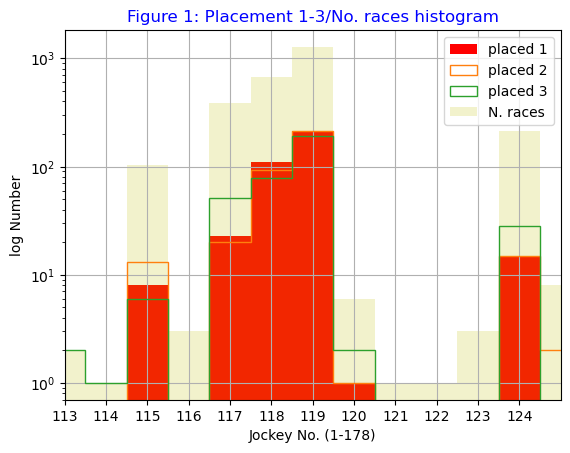

In [9]:
Nfig = 1
#y = np.sort(Jockp)#/ np.max(Jockn)
x = np.array(dfa['JOCK_index'])
y = np.array(dfb['JOCK_index'])
z = np.array(dfc['JOCK_index'])
w = np.array(df1['JOCK_index'])
n, bins, patches = plt.hist(x, jbins, histtype='stepfilled',facecolor='r',alpha=1,label="placed 1")
n, bins, patches = plt.hist(y, jbins, histtype='step',facecolor='g',alpha=1,label="placed 2")
n, bins, patches = plt.hist(z, jbins, histtype='step',facecolor='b',alpha=1,label="placed 3")
#n, bins, patches = plt.hist(w, jbins, histtype='stepfilled',facecolor='g',alpha=0.2,label="No. races")
plt.xlabel('Jockey No. (1-178)')
plt.ylabel('log Number')
#plt.plot(x,y)
xlims = [113,125]
plt.xlim(xlims)
plt.grid(True)
plt.bar(jbins1,Jockn,color='y',width=1,alpha=0.2,label="N. races")
#plt.ylim(0,300)
plt.yscale('log')
plt.xticks(np.arange(113,125))
plt.title("Figure "+str(Nfig)+": Placement 1-3/No. races histogram",color='b')
plt.legend()
plt.show()

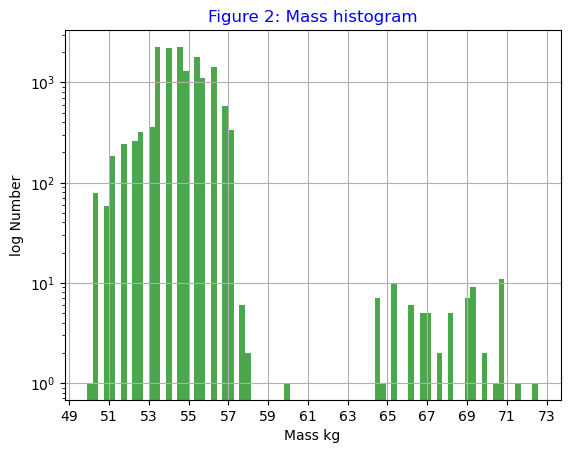

In [10]:
Nfig += 1
x = Jdata['MASS']
v1, b1, patches = plt.hist(x, 80, facecolor='green',alpha=0.7)
plt.xlabel('Mass kg')
plt.ylabel('log Number')
plt.yscale('log')
#
#plt.ylim(0, 100)
plt.grid(True)
plt.xticks(np.arange(49,74,2))
plt.title("Figure "+str(Nfig)+": Mass histogram",color='b')
plt.show()

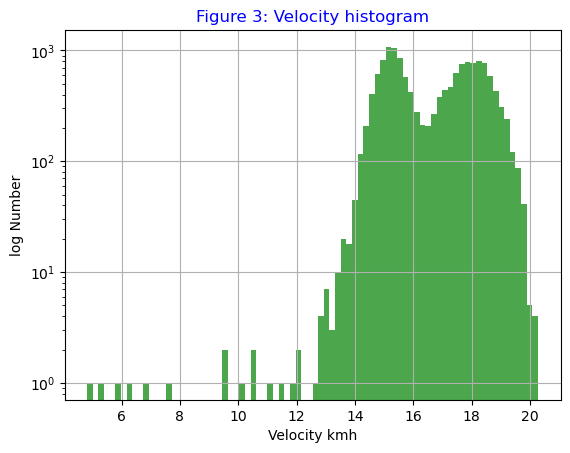

In [11]:
Nfig +=1
x = Jdata['MED_velocity']
v1, b1, patches = plt.hist(x, 80, facecolor='green',alpha=0.7)
plt.xlabel('Velocity kmh')
plt.ylabel('log Number')
plt.yscale('log')
#
#plt.ylim(0, 100)
plt.grid(True)
#plt.xticks(np.arange(49,74,2))
plt.title("Figure "+str(Nfig)+": Velocity histogram",color='b')
plt.show()

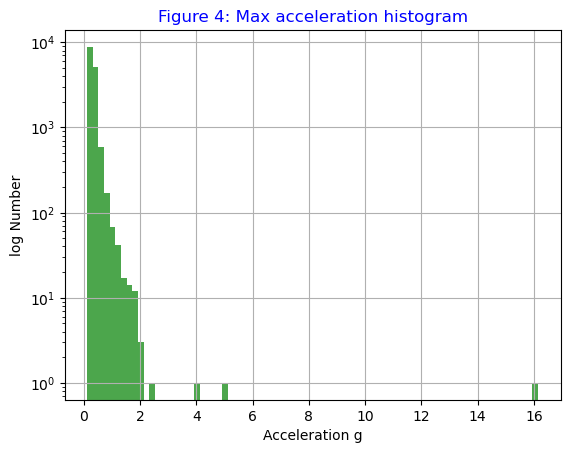

In [12]:
Nfig += 1
x = Jdata['MAX_accel']
v1, b1, patches = plt.hist(x, 80, facecolor='green',alpha=0.7)
plt.xlabel('Acceleration g')
plt.ylabel('log Number')
plt.yscale('log')
#
#plt.ylim(0, 100)
plt.grid(True)
#plt.xticks(np.arange(49,74,2))
plt.title("Figure "+str(Nfig)+": Max acceleration histogram",color='b')
plt.show()

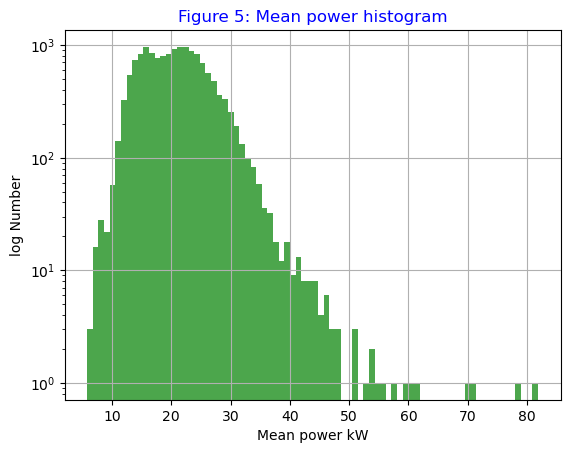

In [13]:
Nfig += 1
x = Jdata['MEAN_power']
v1, b1, patches = plt.hist(x, 80, facecolor='green',alpha=0.7)
plt.xlabel('Mean power kW')
plt.ylabel('log Number')
plt.yscale('log')
#
#plt.ylim(0, 100)
plt.grid(True)
#plt.xticks(np.arange(49,74,2))
plt.title("Figure "+str(Nfig)+": Mean power histogram",color='b')
plt.show()

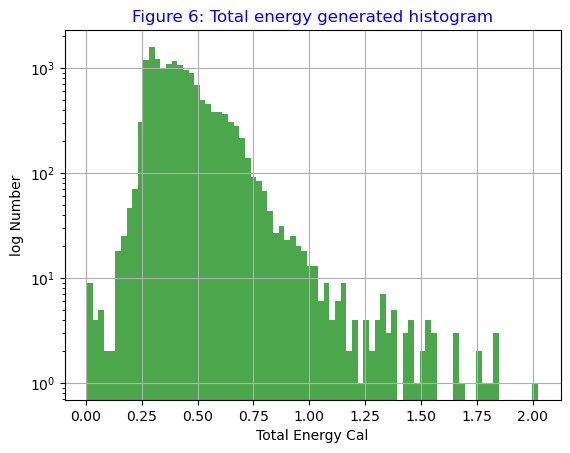

In [14]:
Nfig += 1
x = Jdata['TOT_energy']
v1, b1, patches = plt.hist(x, 80, facecolor='green',alpha=0.7)
plt.xlabel('Total Energy Cal')
plt.ylabel('log Number')
plt.yscale('log')
#
#plt.ylim(0, 100)
plt.grid(True)
#plt.xticks(np.arange(49,74,2))
plt.title("Figure "+str(Nfig)+": Total energy generated histogram",color='b')
plt.show()

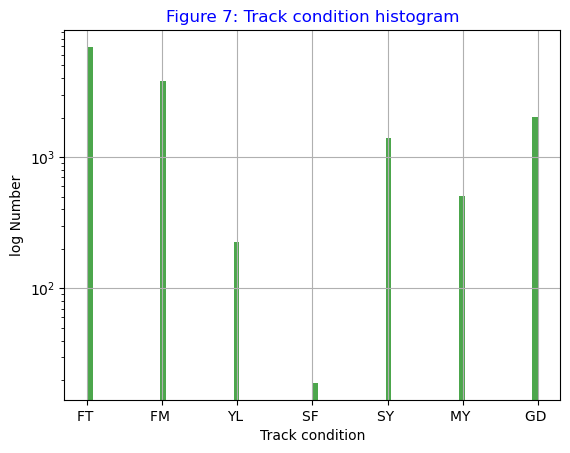

In [15]:
Nfig += 1
x = Jdata['track_condition']
v1, b1, patches = plt.hist(x, 80, facecolor='green',alpha=0.7)
plt.xlabel('Track condition')
plt.ylabel('log Number')
plt.yscale('log')
#
#plt.ylim(0, 100)
plt.grid(True)
#plt.xticks(np.arange(49,74,2))
plt.title("Figure "+str(Nfig)+": Track condition histogram",color='b')
plt.show()

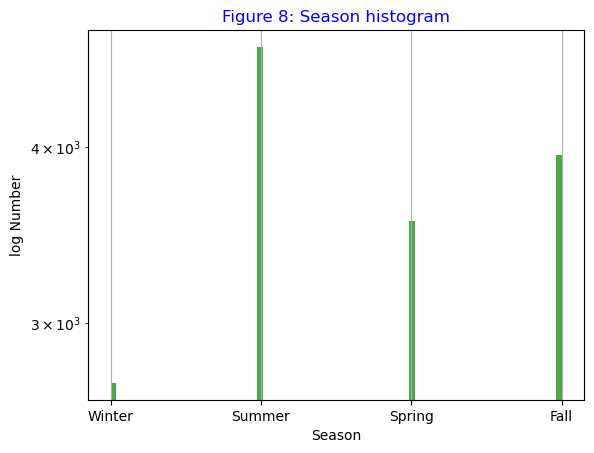

In [16]:
Nfig += 1
x = Jdata['Season']
v1, b1, patches = plt.hist(x, 80, facecolor='green',alpha=0.7)
plt.xlabel('Season')
plt.ylabel('log Number')
plt.yscale('log')
#
#plt.ylim(0, 100)
plt.grid(True)
#plt.xticks(np.arange(49,74,2))
plt.title("Figure "+str(Nfig)+": Season histogram",color='b')
plt.show()

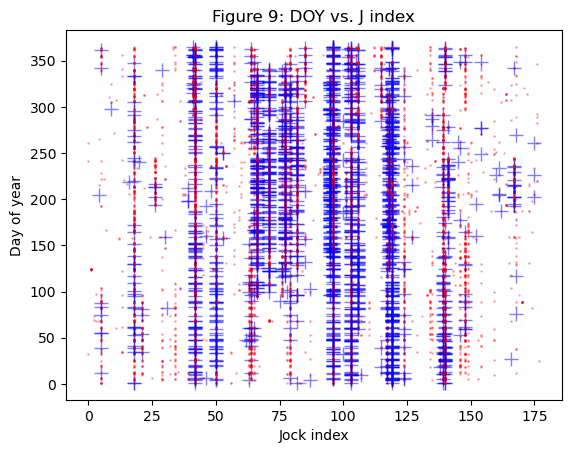

In [17]:
Nfig = 9
# plot races vs. jockey with placement
jocs = Jdata['JOCK_index'].unique()
njoc = len(jocs)
ndat = len(Jdata)
icol = ['go','b+','mx','ro']
n=0
for ijoc in range(njoc):
    currj= Jdata.loc[Jdata['JOCK_index']==jocs[ijoc]]
    for j in range(len(currj)):
        race= currj['race_date'].iloc[j]
        ncol = min(currj['placed'].iloc[j],3)
        plac= icol[ncol]
        xjoc= currj['JOCK_index'].iloc[j]
        ms=1
        if (ncol < 2):
            ms=10
        plt.plot(xjoc,race,plac,alpha=1./(ncol+1),ms=ms)#?
        n+=1
#print(n)
plt.xlabel("Jock index")
plt.ylabel("Day of year")
plt.title("Figure "+str(Nfig)+": DOY vs. J index")
plt.show()

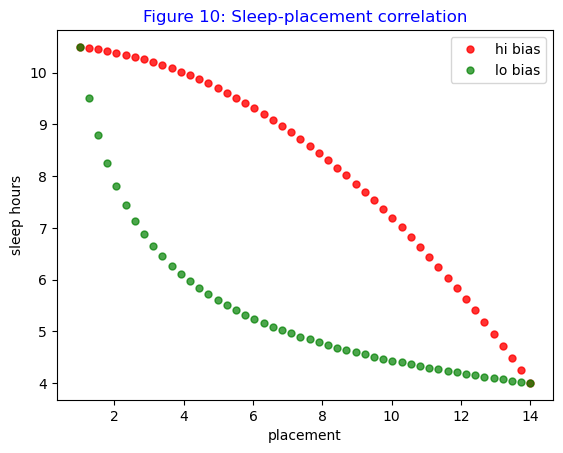

In [18]:
Nfig += 1
plotqmodel(xlo,ylo,xhi,yhi)

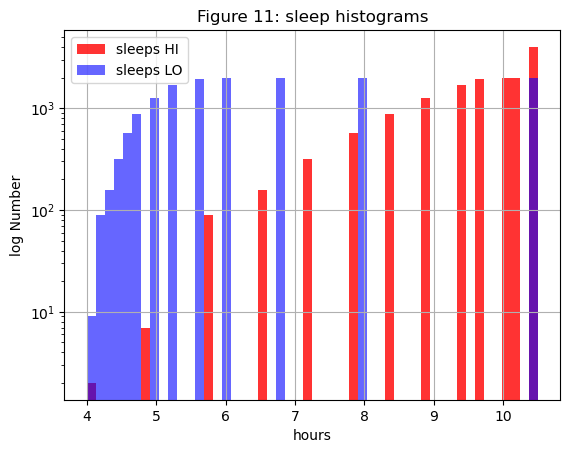

In [19]:
Nfig = 11
x = JvecHI[:,5]#
y = JvecLO[:,5]#
# 
v1, b1, patches = plt.hist(x, 50,  facecolor='r',alpha=0.8,label='sleeps HI')
v2, b2, patches = plt.hist(y, 50,  facecolor='b',alpha=0.6,label='sleeps LO')
plt.xlabel('hours')
plt.ylabel('log Number')
plt.title('Figure '+str(Nfig)+': sleep histograms')
#plt.xlim(4, 10)
#plt.ylim(0, 10)
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()

---------
## Jdata calculation
---------

In [ ]:
start=time.time()
# find all the jockeys
# low element counter
nNO = 0
# start index for JdataLIST
nstart=0
# initialize T,x,y lists
TS=[]
XS=[]
YS=[]
Jdatlist= Jdates.tolist()
jocs = nydata['jockey'].unique()
njock = jocs.size
print("No. of jockeys ",njock)
# bins for choosing age from PDFs
age1 = 17
age2 = 44
binJockn = np.linspace(age1,age2,njock)
# start, end indices
nnow1 = 0
nnow2 = njock
if (nnow2 < njock):
    print(colored("           But run "+str(nnow1)+" to "+str(nnow2-1),'magenta'))
#
# main loop for njock jockeys
#for ijoc in range(njock):
for ijoc in range(nnow1,nnow2):
    # current jockey entries in currjock, sortit by date, time, tindex
    currjock = nydata.loc[(nydata['jockey'] == jocs[ijoc])]
    currjock = currjock.sort_values(by=
            ['race_date','race_number','program_number','trakus_index'])
    # Jockey's name
    JNAME = jocs[ijoc]
    lenjock = len(currjock)
    print("\n",colored("-->"+JNAME+" No. "+str(ijoc+1)+" of "+str(njock)+
                                " No. rows "+str(lenjock),'cyan',attrs=['reverse']))
    # unique dates for this jockey
#    nratt = currjock['race_type'].unique()
#    print(nratt)
#    raise KeyboardInterrupt
    nratd = currjock['race_date'].unique()
    ncrun=0
    nctot=0
    ncbad=0
    # save currjock?
    df = currjock.copy()
    # JOCKA is number of placed < 6, normalized
#    JOCKA = Jockp[ijoc]
    JOCKA = np.random.choice(binJockn, size=None, p=probJockp) # sample from pdf
#    JOCKN = Jockn[ijoc]
    JOCKN = np.random.choice(binJockn, size=None, p=probJockn) # sample from pdf
    for iratd in range(len(nratd)): #loop 1
        currdate = nratd[iratd]
        filtd = (df["race_date"] == nratd[iratd])
        df1 = df[filtd]
#
        nprog = df1['program_number'].unique()
        ntotp = len(nprog)
        for iprog in range(len(nprog)): # loop 3
            filtn = (df1['program_number'] == nprog[iprog])
            df2 = df1[filtn]
            nratn = df2['race_number'].unique()
            for iratn in range(len(nratn)): # loop 4

                filtr = (df2['race_number'] == nratn[iratn])
                djock = df2[filtr]
        #   set sleep for jockey, date
        # placed is position_at_finish for this race
                placed = djock['placed'].iloc[0]
                JOCKS  = get_sleep(placed,0)
                JOCKS1 = get_sleep(placed,1)
        # size of current jockey block
                ncurr = len(djock)
                # No. of elements in the track
                NELEM = ncurr
                nctot += ncurr
                ncrun += 1
                if (ncurr == 0):
                    ncbad += 1
                    print(colored([JNAME," EMPTY list, run No. ",ncrun,
                                       "No. progs ",ntotp],'red'))
                    print(colored(["NO contents for race ",nprog[iprog],
                                       "No. ",ncbad],'red'))
                    break
                else:
                    sprog = djock['program_number'].iloc[0].strip()
                # drop dupes per trakus_index
                ndupe = len(djock)
                djock = djock.drop_duplicates(subset=['trakus_index'])
                ncurr = len(djock)
                dupes = ncurr - ndupe
#
                TS=np.array(djock['trakus_index'])*DELTAT
                XS=np.array(djock['longitude'])
                YS=np.array(djock['latitude'])
            # date
                RDAT = djock['race_date'].iloc[0]
#                get_ddhhmm(RDAT) switch back to day, post
                posttime = djock['post_time'].iloc[0]

                SEAS = get_season(RDAT)   
                trackid = djock['track_id'].iloc[0]
        # base columns from djock
                col0 = [trackid,                      #0 
                    RDAT,                             #1
                    djock['distance_id'].iloc[0],     #2
                    djock['course_type'].iloc[0],     #3
                    djock['track_condition'].iloc[0], #4
                    djock['run_up_distance'].iloc[0]] #5
                col1 = [djock['race_type'].iloc[0],   #6
                    posttime,                         #7
                    djock['weight_carried'].iloc[0],  #8
                    JNAME,                            #9
                    ijoc,                             #10
                    djock['purse'].iloc[0],           #11
                    djock['odds'].iloc[0]]            #12
                if ((iratd+1) % 15 == 0 and iratn==len(nratn)-1 and iprog==len(nprog)-1):
                    text=colored(["-->"+JNAME+" "+trackid+ss(iratd+1,nratd)+
                                  ss(iratn+1,nratn)+' prog '+sprog+" ncurr: "+
                                      str(ncurr)],'blue',attrs=['reverse'])
                    print(text)
                if (ncurr==0):
                    print(colored("INTERRUPT",'red',attrs=['reverse','blink','bold']))
                    raise KeyboardInterrupt
   # Post time
                RACET = posttime
    # each step is a segment, get diff of successive x,y
                XS1 = XS[1:ncurr]-XS[0:ncurr-1]
                YS1 = YS[1:ncurr]-YS[0:ncurr-1]
    # magnitude of each diff x,y vector
                scale=scale1
                if (djock['track_id'].iloc[0] == 'SAR'):
                    scale=scale2
                R = np.sqrt(XS1*XS1 + YS1*YS1)*scale # in m
                rn = R.size
    # use x,y diffs to get E from N angles
                T = np.arctan2(XS1,YS1)
                TOTD = np.sum(R)
    # diff of successive times, which is fixed at 0.25 sec anyway
                DTS = TS[1:ncurr]-TS[0:ncurr-1]
                if np.min(DTS) < DELTAT:
                    print(colored([JNAME,"Index ",ijoc,
                                       " ERROR, DTS<DELTAT"],'red'))
                    print(colored(["Size of x,y ",rn],'red'))
                    print("  counters: ",irat," DTS, TS sizes: ",DTS.size,TS.size)
                    print("  race date ",nrat[irat])
                    print(TS)
                    print(djock)
                    raise KeyboardInterrupt 
    # total time from trakus_index
                RTIME = np.around(np.sum(DTS))
                MEANVEL = TOTD/RTIME
    # save JdataLIST entries
                nend = nstart+NELEM
                JdataLIST.loc[len(JdataLIST.index)] =[JNAME,nstart,nend,
                    trackid,nratd[iratd],posttime,RTIME,placed]
                nstart = nend
    # save this race data, rectified, to JdataRECT
                JdataRECT = pd.concat([JdataRECT,djock])
    # x,y vels scaled to m/s
                XV1 = scale*XS1/DTS
                YV1 = scale*YS1/DTS
                # magnitude of vel
                VV = R/DTS # in m/s
                VV = signal.medfilt(VV,kermed)
                CVV = np.convolve(VV, kernel, mode='same')
                MEDVEL = np.median(VV)
#    max vel 
                MAXVEL = TOKMH*VV.max() # in km/h
    # angle of vel in deg
                VTT = np.arctan2(XV1,YV1)*RADDEG
    # mass of jockey in kg
                MASS = djock['weight_carried'].iloc[0]*PTOKG
     # x,y accelerations m/s^2
                ncurr1 = VV.size
                AX1 = (XV1[1:ncurr1]-XV1[0:ncurr1-1])/DTS[0:ncurr1-1]
                AY1 = (YV1[1:ncurr1]-YV1[0:ncurr1-1])/DTS[0:ncurr1-1]
    # magnitude of accel
                AXY = np.sqrt(AX1*AX1+AY1*AY1)
                AXY = signal.medfilt(AXY,kermed)
                CAXY = np.convolve(AXY, kernel, mode='same')
    # kinetic power in jockey+horse mass M*acc*vel
                KPOW = (AVGHM+MASS)*AXY*VV[1:ncurr-1]/1000 # in KWatts
    #                KPOW = np.convolve(KPOW,kernel,mode='same')
    # magnitude of accel
                CAXY = CAXY/GACC # in g
    # max power
                MEANKPOW = np.mean(KPOW)
        # velocity
                CVV = TOKMH*CVV # in km/h for plot
   # total energy spent on jockey sum(Power*deltaT)
                TOTEN = np.sum(KPOW*DTS[0:ncurr-2])*WACAL # Cal
    # angle of accel
                ATT = np.arctan2(AX1,AY1)*RADDEG
                MAXACC = np.max(CAXY)
    # convert angles to -90 +90 range
                VTT = [t-180 if t>90  else t+180 if t<-90 else t for t in VTT] 
                ATT = [t-180 if t>90  else t+180 if t<-90 else t for t in ATT] 
    # smooth for plotting
                CVTT = np.convolve(VTT, kernel, mode='same')
            # add values for this jockey to Jdata dataframe
                col2 = [SEAS,    #13
                    RTIME,   #14
                    MASS,    #15
                    MEANVEL, #16
                    MEDVEL,  #17
                    MAXVEL,  #18
                    MAXACC,  #19
                    MEANKPOW,#20
                    TOTEN,   #21
                    JOCKA,   #22
                    JOCKS,   #23                     
                    JOCKS1,  #24                     
                    JOCKN,   #25
                    placed,  #26
                    NELEM,   #27
                    dupes]   #28
                cols = col0+col1+col2
#                if (ncurr <80): # or time elapsed < 20 sec
#                    Jdata20.loc[len(Jdata20.index)] = cols
                if (MAXVEL < 100):
                    Jdata.loc[len(Jdata.index)] = cols
                else:
                    JdataBAD.loc[len(JdataBAD.index)] = cols
#    CAY1 = np.convolve(AY1, kernel, mode='same')
                CATT = np.convolve(ATT, kernel, mode='same')
                CKPW = np.convolve(KPOW, kernel, mode='same')
                TOTD = np.around(TOTD)
            

    # make plots
    if (ijoc % 20 == 0):
        trackid = " "+JNAME+" "+djock['track_id'].iloc[0]+\
            " placed "+str(placed)+" "+str(RACET)+\
            " "+str(RDAT)+" runtime "+str(RTIME)+" sec dist "+str(TOTD)+" m"
        print(colored(" N. segments "+str(rn)+trackid,"red",attrs=['reverse']))
        print("                          ",colored("Track, Vel plots\n","blue"))               
        showtrack(trackid,XS,YS)
        showvelpow(TS,CVV,CVTT,CKPW)
    #
    end=time.time()
    #
    print(" ",colored("Loops Time "+str(np.around(end-start,2))+" sec",'magenta'))
    start=end
    # save intermediate Jdata frames
                #  at intervals, and at the end of a run
                #  print(ijoc,nnow2,iratd,len(nratd))
    if (((ijoc+1) % 300 == 0 or ijoc == (nnow2-1))):
        # delete previous saved Jdata*.csv
        for p in Path(".").glob("Jdata*.csv"):
            p.unlink()
        # datetime for timestamp
        now = datetime.now()
        dt_string = now.strftime("%y%m%d-%H%M%S")
        print("\n",colored("-->"+JNAME+" No. "+str(ijoc+1)+\
            " save Jdata at "+dt_string,'magenta',attrs=['reverse']))
        Jdata.to_csv("Jdata-"+dt_string+".csv",index=False)                        
        JdataRECT.to_csv("JdataRECT-"+dt_string+".csv",index=False)
        JdataLIST.to_csv("JdataLIST-"+dt_string+".csv",index=False)
        JdataBAD.to_csv("JdataBAD-"+dt_string+".csv",index=False)

----------
## Jvec calculation
----------

In [ ]:
# GENERATE VECTORS for NN
# find all the jockeys
# initialize arrays to map strings to indices
Jrt=np.array(['MCL' ,'STK' ,'MSW' ,'CLM', 'ALW', 'AOC' ,'SST', 'STR' ,
              'SOC' ,'WCL', 'WMC' ,'SHP'])
Jct=np.array(['D', 'T', 'I', 'O', 'M'])
Jtc=np.array(['FT ', 'FM ' ,'YL ', 'SF ','SY ', 'MY ' ,'GD '])
Jid=np.array(['AQU','BEL','SAR'])
lenrt=len(Jrt)
lenct=len(Jct)
lentc=len(Jtc)
lenid=len(Jid)
#DIScale=np.max(nydata['distance_id']) # max dist id from furlong to km
# calc avg, std
tt = np.array(Jdata['post_time']).astype('uint64')
#tt = str(tt).zfill(4) # takes care of hh<10
stt = [stt:=str(tt[i]).zfill(4) for i in range(len(tt)) if True]
tt  = [tt:=(int(stt[i][0:2])+int(stt[i][2:4])/60)/24. \
       for i in range(len(stt)) if True]
MEAN_POSTT = np.mean(tt)
STD_POSTT = np.std(tt)
tt = Jdata['run_up_distance'] # in ft
MEAN_RUNUP = np.mean(tt)
STD_RUNUP = np.std(tt)
tt = Jdata['distance_id'] # in 100*furlong
MEAN_DISID = np.mean(tt)
STD_DISID = np.std(tt)
tt = Jdata['RUN_time']
MEAN_RTIME = np.mean(Jdata['RUN_time'])
STD_RTIME = np.std(Jdata['RUN_time'])
MIN_MEANVEL = np.min(Jdata['MEAN_velocity'])
MAXMIN_MEANVEL = np.max(Jdata['MEAN_velocity'])-MIN_MEANVEL
MIN_MEDVEL = np.min(Jdata['MED_velocity'])
MAXMIN_MEDVEL = np.max(Jdata['MED_velocity'])-MIN_MEDVEL
MIN_MAXVEL = np.min(Jdata['MAX_velocity'])
MAXMIN_MAXVEL = np.max(Jdata['MAX_velocity'])-MIN_MAXVEL
MEAN_MAXACC = np.mean(Jdata['MAX_accel'])
STD_MAXACC = np.std(Jdata['MAX_accel'])
MAX_MAXACC = np.max(Jdata['MAX_accel'])
MEAN_MEANKPOW = np.mean(Jdata['MEAN_power'])
STD_MEANKPOW = np.std(Jdata['MEAN_power'])
tt = Jdata['MEAN_velocity']*Jdata['RUN_time']
MEAN_TOTD = np.mean(tt)
STD_TOTD  = np.std(tt)
MIN_JOCKA = np.min(Jdata['JOCK_age'])
MAXMIN_JOCKA = np.max(Jdata['JOCK_age'])-MIN_JOCKA
MAX_JOCKA = 40.
MAX_JOCKP = np.max(Jockp)
MIN_JOCKN = np.min(Jdata['JOCK_races'])
MAX_JOCKN = np.max(Jdata['JOCK_races'])
MEAN_JOCKS = np.mean(Jdata['JOCK_sleep'])
STD_JOCKS = np.std(Jdata['JOCK_sleep'])
MAX_JOCKS = np.max(Jdata['JOCK_sleep'])
MEAN_MASS = np.mean(Jdata['MASS'])
STD_MASS = np.std(Jdata['MASS'])
MIN_PURSE = np.min(Jdata['purse'])
MAXMIN_PURSE = np.max(Jdata['purse'])-MIN_PURSE
MEAN_ODDS = np.mean(Jdata['odds'])
STD_ODDS = np.std(Jdata['odds'])

lnel = np.max(Jdata['NELEM'])
jocs = Jdata['jockey'].unique()
njocs = jocs.size
print("No. of jockeys ",njocs)
njdat = len(Jdata)
print("No. of Jdata entries ",njdat)
nnow1 = 0
nnow2 = njdat
Jvecnam='Jvec'
fJvec = (Jvecnam in locals())
if (fJvec):
    del Jvec
Tvecnam='Tvec'
fTvec = (Tvecnam in locals())
if (fTvec):
    del Tvec
#
# main loop for njock jockeys
#for ijoc in range(njock):
MAXRTIME = np.max(Jdata['RUN_time'])
MAXMEANVEL = np.max(Jdata['MEAN_velocity'])
MAXTOTD = MAXRTIME*MAXMEANVEL
MAXMEDVEL = np.max(Jdata['MED_velocity'])
for ijoc in range(nnow1,nnow2):
    start=time.time()
#
    # current jockey entries in currjock, sortit by date, time, tindex
    djock = Jdata.iloc[ijoc]
    # Jockey's name
    TJNAME = djock['jockey']
    ijockey = djock['JOCK_index']/njocs
    if (ijoc % 100 == 0):
        print("\n",colored("-->"+TJNAME+" No. "+str(ijoc+1),'cyan',attrs=['reverse']))
    Tijockey = djock['JOCK_index']
    NELEM = djock['NELEM']/lnel
    # dates
    RDAT = djock['race_date']
    TRDAT = RDAT
    SEAS = get_season_i(RDAT) + 4 # season as fraction 0-1
    RDAT /= 365.
    tt=djock['post_time']
    TPOSTT = tt
    tt = str(tt).zfill(4) # takes care of hh<10
    tt  = (int(tt[0:2])+int(tt[2:4])/60)/24.

#    POSTT = (int(tt[0:2])+int(tt[2:4])/60)/24.
    POSTT = (tt - MEAN_POSTT)/STD_POSTT + 2
    # distances
    RUNUP = (djock['run_up_distance'] - MEAN_RUNUP)/STD_RUNUP 
    DISID = (djock['distance_id'] - MEAN_DISID)/STD_DISID
    # position_at_finish
    placed = djock['placed']
    # Post time
#    RACET = djock['post_time']
    # total time from trakus_index
    RTIME = (djock['RUN_time'] - MEAN_RTIME)/STD_RTIME + 1
    MEANVEL = (djock['MEAN_velocity'] - MIN_MEANVEL)/MAXMIN_MEANVEL
    tt = djock['MEAN_velocity']*djock['RUN_time']
    TOTD=(tt - MEAN_TOTD)/STD_TOTD # norm mean,std
#    RTIME += 0.5
    MEDVEL = (djock['MED_velocity']- MIN_MEDVEL)/MAXMIN_MEDVEL
#    max vel etc. norm to [0-1]
#    Vm = Jdata['MAX_velocity']
#    Vm = Vm-np.min(Vm)
#    MAXVEL = djock['MAX_velocity']/np.max(Vm)
    MAXVEL = (djock['MAX_velocity'] - MIN_MAXVEL)/MAXMIN_MAXVEL
#    MAXVEL += 1
#     Jdata['JOCK_age']
#    JOCKA = (djock['JOCK_age'] - MIN_JOCKA)/MAXMIN_JOCKA
#    JOCKA =  djock['JOCK_age']
    JOCKA =  Jockp[djock['JOCK_index']]/MAX_JOCKP
#    JOCKA = djock['JOCK_age']
    #    Jdata['JOCK_races']
    JOCKN = djock['JOCK_races']/MAX_JOCKN
#    Jdata['JOCK_sleep']
#    JOCKS = (djock['JOCK_sleep'] - MEAN_JOCKS)/STD_JOCKS + 1
#    JOCKS = djock['JOCK_sleep']   
    JOCKS = djock['JOCK_sleep']   
    TJOCKS = np.around(JOCKS,2)
    TJOCKS1 = np.around(djock['JOCK_sleep1'],2)
    JOCKS = TJOCKS1  
    # mass of jockey in kg
    MASS = (djock['MASS'] - MEAN_MASS)/STD_MASS + 2 # norm below about 75kg
    # magnitude of accel
    MAXACC = djock['MAX_accel']/MAX_MAXACC
    # mean power
    MEANKPOW = (djock['MEAN_power'] - MEAN_MEANKPOW)/STD_MEANKPOW + 3
#    MEANKPOW += 0.5
   # total energy spent on jockey sum(Power*deltaT)
    TOTEN = djock['TOT_energy'] # Cal
    c1 = djock['race_type']
    c2 = djock['track_condition']
    c3 = djock['course_type']
    c4 = djock['track_id']
    TTRACKID=c4
    PURSE = (djock['purse'] - MIN_PURSE)/MAXMIN_PURSE
    ODDS = (djock['odds'] - MEAN_ODDS)/STD_ODDS
    RACTY = ([i+1 for i in range(len(Jrt)) if (Jrt == c1)[i]][0])/lenrt +2
    CONDI = ([i+1 for i in range(len(Jtc)) if (Jtc == c2)[i]][0])/lenct+2
    TRACK = ([i+1 for i in range(len(Jct)) if (Jct == c3)[i]][0])/lentc+4
    TRACKID = ([i+1 for i in range(len(Jid)) if (Jid == c4)[i]][0])/lenid 
#    TRACKID += 5
    # base columns from djock
    JvecCOLS = [ijockey,     #0
                    TRACKID, #1            
                    RDAT,    #2
                    POSTT,   #3
                    RTIME,   #4
#                
                    JOCKA,   #5
                    JOCKS,   #6
                    JOCKN,   #7
                    MASS,    #8
                    SEAS,    #9
#
                    TOTD,    #10
                    MEANKPOW,#11
                    ODDS,    #12
                    PURSE,   #13
                    CONDI,   #14                
 #               
                    DISID,   #15
                    RUNUP,   #16
                    RACTY,   #17
                    TRACK,   #18
                    MEANVEL, #19
 #               
                    MEDVEL,  #20
                    MAXVEL,  #21
                    MAXACC,  #22
                    TOTEN,   #23
                    NELEM]   #24
    TvecCOLS = [TJNAME,   #0
                Tijockey, #1
                TTRACKID, #2            
                TRDAT,    #3
                TPOSTT,   #4
                TJOCKS,   #5
                TJOCKS1,  #6
                placed]   #7
#    JvecCOLS=np.array(JvecCOLS)
#    print(Jvec)
    fJvec = (Jvecnam not in locals())
    if (fJvec):
        Jvec = JvecCOLS
        Tvec = TvecCOLS
        Jy = np.array(placed)
    else:
        Jvec = np.vstack((Jvec,JvecCOLS))
        Tvec = np.vstack((Tvec,TvecCOLS))
        Jy = np.vstack((Jy,placed))
    end=time.time()
    if (ijoc % 100 == 0):
        print(" ",colored("Loops Time "+str(np.around(end-start,4))+" sec",'magenta'))
        start=end
#Jvec=Jvec.T # cols have jockeys, one in each row now

In [24]:
# LO, HI Jvec
JvecP = Jvec.copy()
JvecLO = JvecP.copy()
JvecLO[:,6] = Tvec[:,5]
JvecHI = JvecP.copy()
JvecHI[:,6] = Tvec[:,6]

In [29]:
# save data vectors
#now = datetime.now()
#dt_string = now.strftime("%y%m%d-%H%M%S")
dt_string='221022-181048' # stable version
with open('Vectors-'+dt_string+'.npy', 'wb') as f:
    np.save(f, JvecLO)
    np.save(f, JvecHI)
    np.save(f, JvecP)
    np.save(f, Jy)
    np.save(f, Jdates)
    np.save(f, np.array([pbinslo,probslo,pbinshi,pbinslo]))
    np.save(f, np.array([binJockn,probJockn,probJockp]))
    np.save(f, np.array([Jockn,Jockp]))

--------------
## PLOTS
--------------

In [22]:
# PLOT interesting data
def plot_vals(ind,i1,i2,nplace,maxvel):
    global Nfig
    istart=JdataLIST.iloc[ind]['Start']
    istart+= i1
    iend=JdataLIST.iloc[ind]['End']
    iend-=i2
    dtxy = JdataRECT.iloc[istart:iend].copy()
    # Jockey's name
    JNAME=JdataLIST.iloc[ind]['Jockey']
#
    # placement
    placed = JdataLIST.iloc[ind]['placed']
    if (placed != nplace):
#        print(colored(JNAME+" Placed "+str(placed)+" skip",'red'))
        return
    # Race date
    RDAT = JdataLIST.iloc[ind]['race_date']
    # Post time
    RACET = JdataLIST.iloc[ind]['post_time']
    # total time  
    RTIME = JdataLIST.iloc[ind]['RUN_time']
   # x,y already sorted
    XS=np.array(dtxy["longitude"])
    YS=np.array(dtxy["latitude"])
    # mass of jockey in kg
    MASS = Jdata.iloc[ind]['MASS']
    scale=scale1
    if (JdataLIST['track_id'].iloc[0] == 'SAR'):
        scale=scale2
    # TIME already sorted 
    TS = np.array(dtxy['trakus_index'])*DELTAT
    nx = TS.size
    # each step is a segment, get diff of successive x,y
    XS1 = XS[1:nx]-XS[0:nx-1]
    YS1 = YS[1:nx]-YS[0:nx-1]
    # R is magnitude of each diff x,y vector
    R = np.sqrt(XS1*XS1 + YS1*YS1)*scale # in m
    rn = iend-istart
    # use x,y diffs to get E from N angles
    T = np.arctan2(XS1,YS1)
    # total distance run
    TOTD = np.sum(R)
    # diff of successive times, which is fixed at 0.25 sec anyway
    DTS = TS[1:nx]-TS[0:nx-1]
    # x,y vels scaled to m/s
    XV1 = scale*XS1/DTS
    YV1 = scale*YS1/DTS
    # magnitude of vel

    VV = R/DTS # in m/s
    VV = signal.medfilt(VV,kermed)
    VV = TOKMH*VV # in km/h for plot
    # angle of vel
#    VTT = np.array([math.atan2(XV1[i],YV1[i]) for i in range(len(XV1))])
    XXV1=XV1.astype(float) # python mystery
    YYV1=YV1.astype(float) # python idiocy
    VTT = np.arctan2(XXV1,YYV1)*RADDEG
     # x,y accelerations
    ncurr1 = VV.size
    AX1 = (XV1[1:ncurr1]-XV1[0:ncurr1-1])/DTS[0:ncurr1-1]
    AY1 = (YV1[1:ncurr1]-YV1[0:ncurr1-1])/DTS[0:ncurr1-1]
    # magnitude of accel
#    AXY = np.array([math.sqrt(AX1[i]*AX1[i]+AY1[i]*AY1[i]) for i in range(len(AX1))])
    AAX1 = AX1.astype(float)
    AAY1 = AY1.astype(float)
    AXY = np.sqrt(AAX1*AAX1+AAY1*AAY1)
    AXY = signal.medfilt(AXY,kermed)
    CVV = np.convolve(VV, kernel, mode='same')
    CAXY = np.convolve(AXY, kernel, mode='same')
#    AXY = np.sqrt(AX1*AX1+AY1*AY1) # somehow this doesn't work anymore!!!
    # kinetic power in jockey+horse mass M*acc*deltaX/deltaT=M*a*V
    KPOW = (AVGHM+MASS)*CAXY*CVV[1:ncurr1]/1000 # in KWatts
    # magnitude of accel
    AXY = AXY/GACC # in g
    MAXVEL = np.max(CVV)
    if (MAXVEL < maxvel):
        return
#    print(colored("JdataLIST indices:\n "+str(ind)+" start = "\
#                  +str(istart)+" end = "+str(iend)+"\n",'green',attrs=['reverse']))
    # DO NOT add values for this jockey to Jdata dataframe
    # convert angles to -90 +90 range
    VTT = [t-180 if t>90  else t+180 if t<-90 else t for t in VTT] 
    # smooth for plotting
    CVTT = np.convolve(VTT, kernel, mode='same')
    CKPW = np.convolve(KPOW, kernel, mode='same')
    CKPW = np.minimum(CKPW,200)
#    print(CKPW[0:10])
# make plots
    TOTD = np.around(TOTD)
    trackid = "# "+str(ind)+" "+JNAME+" "+JdataLIST.iloc[ind]['track_id']+\
            " placed "+str(placed)+" "+str(RACET)+\
            " "+str(RDAT)+" runtime "+str(RTIME)+" sec dist "+str(TOTD)+" m"
#    print(colored("J No. "+str(ind)+" N. segments "+str(rn)+trackid,"red",attrs=['reverse']))
#    print("                          ",colored("Track, Vel plots\n","blue",attrs=['reverse']))
    Nfig += 1
    showtrack(trackid,XS,YS,Nfig)
    Nfig += 1
    showvelpow(TS,CVV,CVTT,CKPW,Nfig)
    return

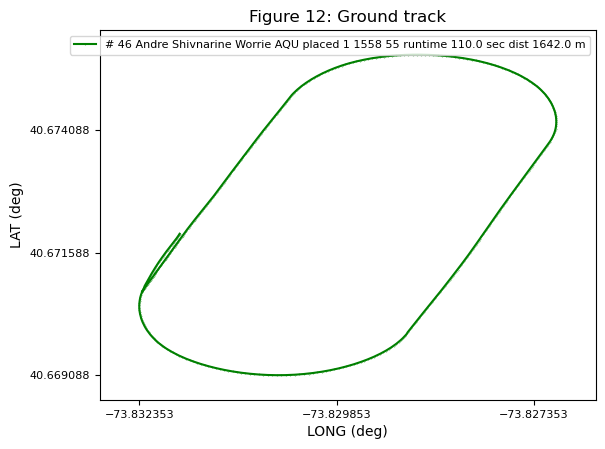

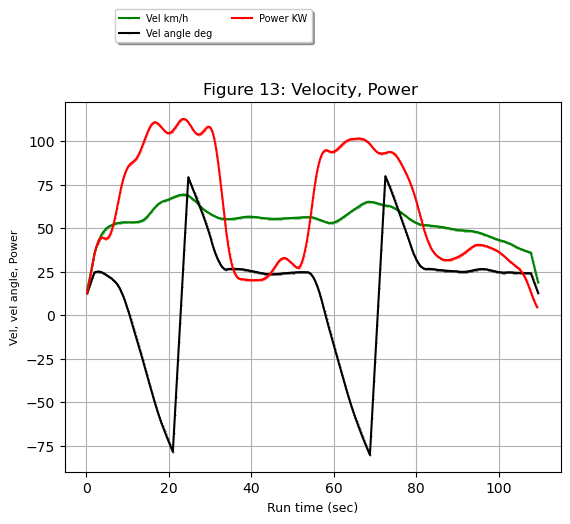

In [23]:
i=46
plot_vals(i,0,0,1,0)

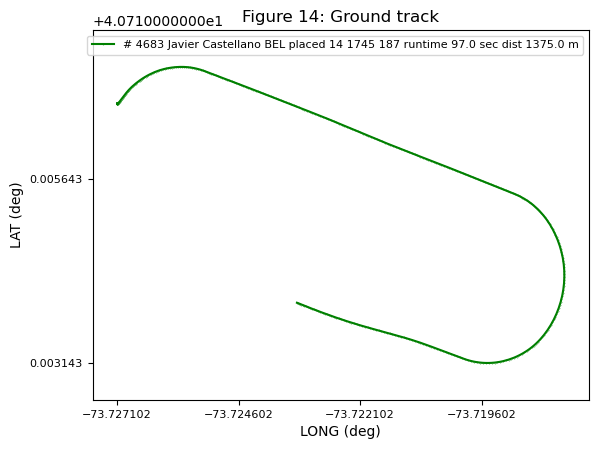

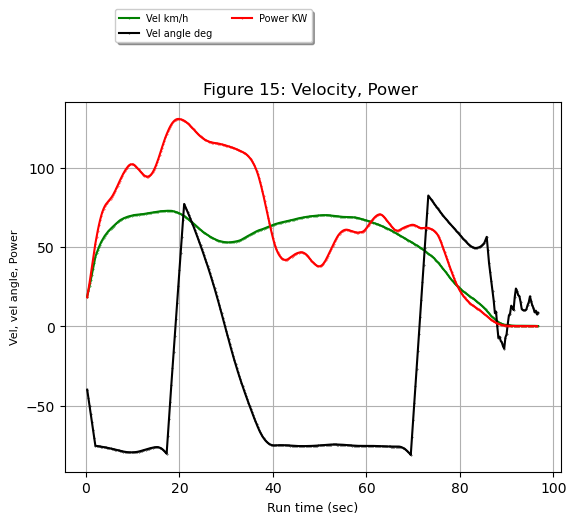

In [24]:
i = 4683
plot_vals(i,0,0,14,0)

--------
# NN Model
--------
## INIT libraries
--------

In [12]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras.regularizers import l2
# Helper libraries
import numpy as np
from numpy import genfromtxt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.ndimage import gaussian_filter
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.colors as colors

print("Tensorflow version: ",tf.__version__)

# For plots, class names are placed values 1-14
class_names = [str(i) for i in range(1,15)]

Tensorflow version:  2.9.1


-----
INIT functions
-----

In [31]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    img1=img.copy()
    xwidth=min(img1.shape[0],5)
    img1= img1.reshape((xwidth,-1))
    plt.grid(False)
    plt.xticks([],rotation=45)
    plt.yticks([])
    
    plt.imshow(img1, norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,vmin=img.min(),\
                        vmax=img.max(), base=10), cmap=plt.cm.hsv)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label[0]:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label[0]]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(True)
    plt.xticks(range(1,15),fontsize=8,rotation=45)
    plt.yticks(np.arange(0,1,0.25))
    thisplot = plt.bar(range(1,16), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')

In [49]:
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Figure '+str(Nfig)+': Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    if (np.max(train_metrics) > 5):
        plt.ylim(0,5)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()


In [905]:
# another model w/regularization, not necessary?
def create_regularized_model(factor, rate):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100, kernel_regularizer=l2(factor), activation="relu")
        tf.keras.layers.Dropout(rate/2),
        tf.keras.layers.Dense(30, kernel_regularizer=l2(factor), activation="relu"),
        tf.keras.layers.Dropout(rate),
        tf.keras.layers.Dense(15)
    ])
    return model

-----
Well fitting model
-----
-----

In [33]:
# 
JvecP=np.array(JvecHI)
#split the data into test and train sets
train_X, test_X, train_y, test_y = train_test_split(JvecP, Jy, test_size=0.3, random_state = 1)

In [65]:
# define NN model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(125, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(15)
])

In [58]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# iterate model and save results for plotting
history = model.fit(train_X,train_y,epochs=350, 
    validation_split=0.2, 
    batch_size=40, 
    verbose=2
)

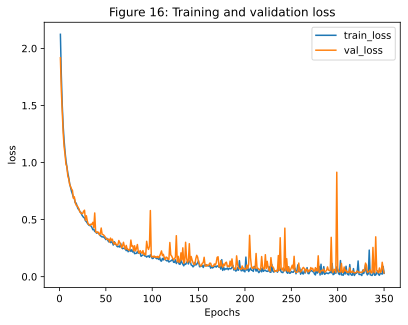

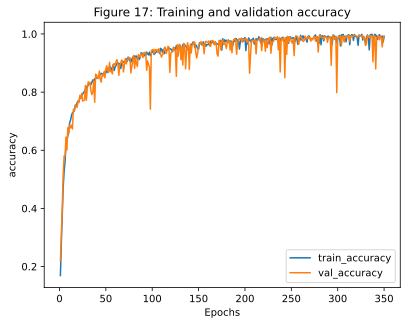

In [37]:
Nfig = 16
#
plot_metric(history, 'loss')
Nfig += 1
plot_metric(history, 'accuracy')

In [38]:
test_loss, test_acc = model.evaluate(test_X,  test_y, verbose=2)
print('\nTest accuracy:', test_acc)

140/140 - 0s - loss: 0.1766 - accuracy: 0.9917 - 78ms/epoch - 559us/step

Test accuracy: 0.9917299747467041


In [39]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_X)

140/140 [==============================] - 0s 601us/step


In [40]:
nlab=0
for i in range(len(predictions)):
    t_label = test_y[i]
    p_label = np.argmax(predictions[i])
    if (t_label != p_label):
        if (nlab == 10):
            print(i,t_label,p_label)
        nlab += 1
print("Number of incorrect predictions: ",nlab," Fraction :",np.around(nlab/len(predictions),2))

1321 [1] 2
Number of incorrect predictions:  37  Fraction : 0.01


                     Figure 18: Data arrays+Predictions


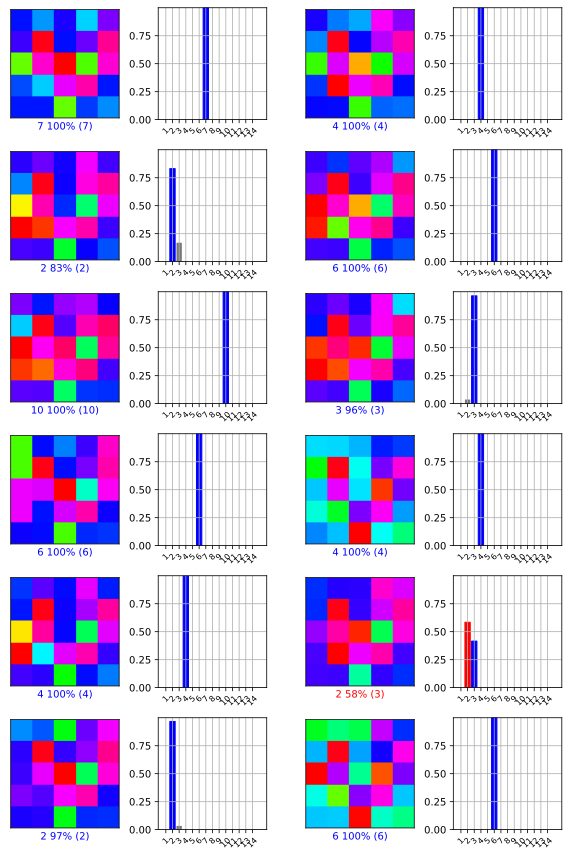

In [41]:
# Plot X test images, their predicted labels, and the true labels.
# Correct predictions are in blue; incorrect ones in red.
Nfig = 18
print("                     Figure "+str(Nfig)+": Data arrays+Predictions")
num_rows = 6
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
nn=974
nn1=num_images+nn
for i in range(nn,nn1):
    ni = (i-nn)
#    print(i,ni)
    plt.subplot(num_rows, 2*num_cols, 2*ni+1)
    plot_image(i, predictions[i], test_y, test_X)
    plt.subplot(num_rows, 2*num_cols, 2*ni+2)
    plot_value_array(i, predictions[i], test_y)
plt.tight_layout()
plt.show()


------
## Underfit model
------

In [64]:
# set sleep hours randomly, with a uniform distribution between 4 and 12 hrs
rng = np.random.default_rng(3490)
nrand = len(JvecHI)
locut=4
hicut=13 # for a range 4-12
JvecR=JvecHI.copy()
# col 6 is for the sleep values
JvecR[:,6]=rng.uniform(locut,hicut,nrand).astype(int)

#split the data into test and train sets
train_X, test_X, train_y, test_y = train_test_split(JvecR, Jy, test_size=0.3, random_state = 1)

In [67]:
# define NN model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(125, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(15)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# iterate model and save results for plotting
history = model.fit(train_X,train_y,epochs=200, 
    validation_split=0.2, 
    batch_size=40, 
    verbose=2
)

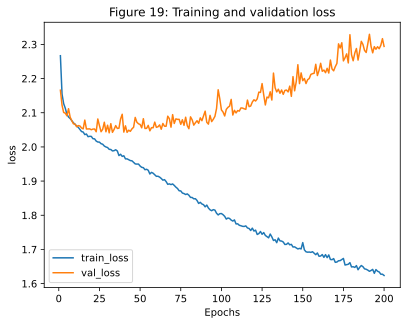

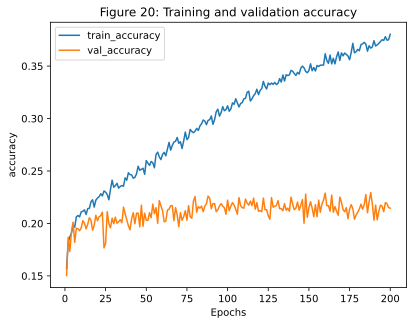

In [69]:
Nfig = 19
#
plot_metric(history, 'loss')
Nfig += 1
plot_metric(history, 'accuracy')

In [70]:
test_loss, test_acc = model.evaluate(test_X,  test_y, verbose=2)
print('\nTest accuracy:', test_acc)

140/140 - 0s - loss: 2.3178 - accuracy: 0.1983 - 83ms/epoch - 590us/step

Test accuracy: 0.19825659692287445


In [71]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_X)

140/140 [==============================] - 0s 598us/step


In [72]:
nlab=0
for i in range(len(predictions)):
    t_label = test_y[i]
    p_label = np.argmax(predictions[i])
    if (t_label != p_label):
        nlab += 1
print("Number of incorrect predictions: ",nlab," Fraction :",np.around(nlab/len(predictions),2))

12 [7] 5
Number of incorrect predictions:  3587  Fraction : 0.8


                     Figure 21: Data arrays+Predictions


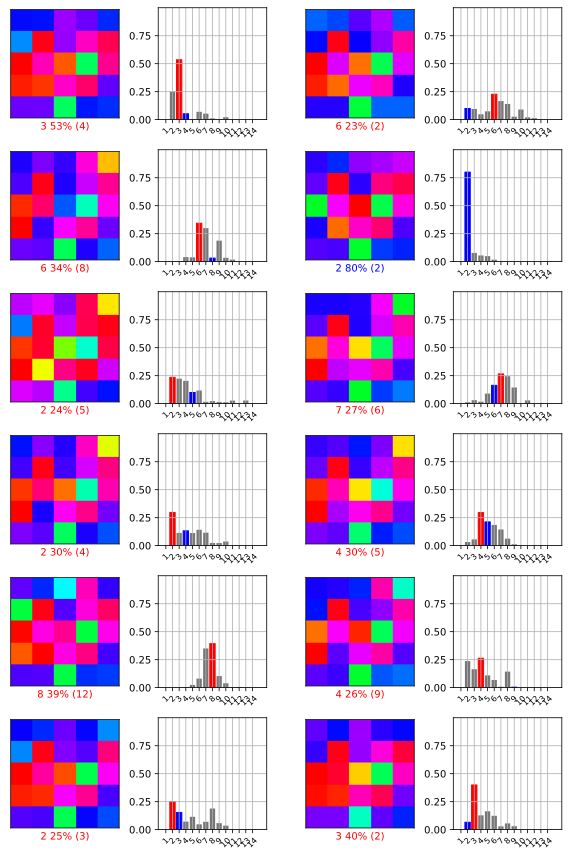

In [73]:
# Plot X test images, their predicted labels, and the true labels.
# Correct predictions are in blue; incorrect ones in red.
Nfig = 21
print("                     Figure "+str(Nfig)+": Data arrays+Predictions")
num_rows = 6
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
nn=10
nn1=num_images+nn
for i in range(nn,nn1):
    ni = (i-nn)
#    print(i,ni)
    plt.subplot(num_rows, 2*num_cols, 2*ni+1)
    plot_image(i, predictions[i], test_y, test_X)
    plt.subplot(num_rows, 2*num_cols, 2*ni+2)
    plot_value_array(i, predictions[i], test_y)
plt.tight_layout()
plt.show()


------
# THE END
------